In [3]:
import pandas as pd

df = pd.read_excel('Adidas.xlsx')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [24]:
# 제품별 판매량
df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

Product
Men's Street Footwear        593320
Men's Athletic Footwear      435526
Women's Apparel              433827
Women's Street Footwear      392269
Women's Athletic Footwear    317236
Men's Apparel                306683
Name: Units Sold, dtype: int64

In [25]:
# 제품별 매출액
df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)

Product
Men's Street Footwear        208826244.0
Women's Apparel              179038860.0
Men's Athletic Footwear      153673680.0
Women's Street Footwear      128002813.0
Men's Apparel                123728632.0
Women's Athletic Footwear    106631896.0
Name: Total Sales, dtype: float64

# 각 도시 별 가장 많이 팔린 제품, 각 주 별 가장 매출이 많은 도시

In [6]:
df['City'].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [10]:
df['State'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [9]:
city_total_sales = df.groupby('City')['Total Sales'].sum()
city_total_sales.sort_values(ascending=False)

City
Charleston        39974797.0
New York          39801235.0
San Francisco     34539220.0
Miami             31600863.0
Portland          30545652.0
Orlando           27682851.0
Seattle           26330718.0
Los Angeles       25634913.0
Houston           25456882.0
Albany            24427804.0
Charlotte         23956531.0
New Orleans       23750781.0
Honolulu          22282457.0
Richmond          21575040.0
Denver            20996536.0
Dallas            20902864.0
Las Vegas         20858509.0
Albuquerque       19865016.0
Boise             19276878.0
Atlanta           18997466.0
Detroit           18625433.0
Cheyenne          18577517.0
Columbus          18484583.0
Knoxville         18067440.0
Birmingham        17633424.0
Manchester        16411667.0
Phoenix           15782221.0
Billings          15710886.0
Jackson           15591709.0
Anchorage         14753103.0
Burlington        14352923.0
Little Rock       12639347.0
Wilmington        12298412.0
Hartford          11573448.0
Boston   

In [19]:
# 각 도시 별 가장 많이 팔린 제품
city_product = df.groupby(['City','Product'])['Units Sold'].sum().reset_index()
idx = city_product.groupby('City')['Units Sold'].idxmax()
result = city_product.loc[idx]
result = result.sort_values(by='Units Sold',ascending=False)
result

,City,Product,Units Sold
62,Charleston,Men's Street Footwear,23819
212,New York,Men's Street Footwear,22707
254,Portland,Men's Street Footwear,18185
278,San Francisco,Men's Street Footwear,17235
134,Houston,Men's Street Footwear,17019
170,Los Angeles,Men's Street Footwear,15575
188,Miami,Men's Street Footwear,15453
68,Charlotte,Men's Street Footwear,13969
146,Jackson,Men's Street Footwear,13839
92,Dallas,Men's Street Footwear,13536


from matplotlib import pyplot as plt
_df_0['Units Sold'].plot(kind='hist', bins=20, title='Units Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Units Sold'].plot(kind='line', figsize=(8, 4), title='Units Sold')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
# 각 주 별 가장 많이 팔린 제품
state_product = df.groupby(['State','Product'])['Units Sold'].sum().reset_index()
idx = state_product.groupby('State')['Units Sold'].idxmax()
result = state_product.loc[idx]
result = result.sort_values(by='Units Sold',ascending=False)
result

,State,Product,Units Sold
188,New York,Men's Street Footwear,35855
26,California,Men's Street Footwear,32810
254,Texas,Men's Street Footwear,30555
50,Florida,Men's Street Footwear,28732
236,South Carolina,Men's Street Footwear,15598
194,North Carolina,Men's Street Footwear,13969
140,Mississippi,Men's Street Footwear,13839
248,Tennessee,Men's Street Footwear,13111
56,Georgia,Men's Street Footwear,12955
2,Alabama,Men's Street Footwear,12612


In [11]:
state_total_sales = df.groupby('State')['Total Sales'].sum()
state_total_sales.sort_values(ascending=False)

State
New York          64229039.0
California        60174133.0
Florida           59283714.0
Texas             46359746.0
South Carolina    29285637.0
Washington        26330718.0
North Carolina    23956531.0
Louisiana         23750781.0
Hawaii            22282457.0
Virginia          21575040.0
Oregon            21349674.0
Colorado          20996536.0
Nevada            20858509.0
New Mexico        19865016.0
Idaho             19276878.0
Georgia           18997466.0
Michigan          18625433.0
Wyoming           18577517.0
Ohio              18484583.0
Tennessee         18067440.0
Alabama           17633424.0
New Hampshire     16411667.0
Arizona           15782221.0
Montana           15710886.0
Mississippi       15591709.0
Alaska            14753103.0
Vermont           14352923.0
Arkansas          12639347.0
Delaware          12298412.0
Connecticut       11573448.0
Massachusetts     11076810.0
West Virginia     10689160.0
Oklahoma          10620734.0
Pennsylvania      10357519.0
Kentucky

In [18]:
# 각 주 별 가장 매출이 많은 도시
state_sales = df.groupby(['State','City'])['Total Sales'].sum().reset_index()
idx = state_sales.groupby('State')['Total Sales'].idxmax()
result2 = state_sales.loc[idx]
result2 = result2.sort_values(by='Total Sales',ascending=False)
result2

,State,City,Total Sales
34,New York,New York,39801235.0
5,California,San Francisco,34539220.0
9,Florida,Miami,31600863.0
42,South Carolina,Charleston,29285637.0
50,Washington,Seattle,26330718.0
46,Texas,Houston,25456882.0
35,North Carolina,Charlotte,23956531.0
19,Louisiana,New Orleans,23750781.0
12,Hawaii,Honolulu,22282457.0
49,Virginia,Richmond,21575040.0


---

# 특정한날(블랙프라이데이, 추수감사절, 크리스마스, 홀리데이 시즌 등)과 그 외 날의 매출차이
- 블랙프라이데이
  - 2020-11-27
  - 2021-11-26
- 추수감사절
  - 2020-11-26
  - 2021-11-25
- 크리스마스
  - 2020-12-25
  - 2021-12-25


### 1. 블랙프라이데이 & 추수감사절
- 2020-11-27, 2020-11-26
- 2021-11-26, 2021-11-25   
➡️ +3, -3일로 기간을 잡자

In [30]:
df[df['Invoice Date']=='2020-11-27']

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
829,Foot Locker,1185732,2020-11-27,Midwest,Minnesota,Minneapolis,Women's Apparel,55.0,375,206250.0,92812.5,0.45,Outlet
4717,Foot Locker,1185732,2020-11-27,Midwest,Minnesota,Minneapolis,Women's Apparel,54.0,98,5292.0,2910.6,0.55,Online


In [74]:
standard = pd.to_datetime('2020-11-27')
filter = pd.date_range(start=standard-pd.DateOffset(days=3),end=standard+pd.DateOffset(days=3),freq='D')
df[df['Invoice Date'].isin(filter)]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
826,Foot Locker,1185732,2020-11-24,Midwest,Minnesota,Minneapolis,Women's Street Footwear,40.0,225,90000.0,27000.00,0.30,Outlet
827,Foot Locker,1185732,2020-11-25,Midwest,Minnesota,Minneapolis,Women's Athletic Footwear,40.0,175,70000.0,24500.00,0.35,Outlet
828,Foot Locker,1185732,2020-11-26,Midwest,Minnesota,Minneapolis,Men's Apparel,50.0,200,100000.0,30000.00,0.30,Outlet
829,Foot Locker,1185732,2020-11-27,Midwest,Minnesota,Minneapolis,Women's Apparel,55.0,375,206250.0,92812.50,0.45,Outlet
830,Foot Locker,1185732,2020-11-28,Midwest,Minnesota,Minneapolis,Men's Street Footwear,50.0,525,262500.0,91875.00,0.35,Outlet
831,Foot Locker,1185732,2020-11-29,Midwest,Minnesota,Minneapolis,Men's Athletic Footwear,45.0,300,135000.0,40500.00,0.30,Outlet
832,Foot Locker,1185732,2020-11-30,Midwest,Minnesota,Minneapolis,Women's Street Footwear,40.0,225,90000.0,27000.00,0.30,Outlet
4714,Foot Locker,1185732,2020-11-24,Midwest,Minnesota,Minneapolis,Women's Street Footwear,36.0,63,2268.0,952.56,0.42,Online
4715,Foot Locker,1185732,2020-11-25,Midwest,Minnesota,Minneapolis,Women's Athletic Footwear,38.0,51,1938.0,930.24,0.48,Online
4716,Foot Locker,1185732,2020-11-26,Midwest,Minnesota,Minneapolis,Men's Apparel,49.0,58,2842.0,1165.22,0.41,Online


In [35]:
filter1 = df['Invoice Date'] == '2020-11-27'
filter2 = df['Retailer']=='Foot Locker'
bf2020 = df[filter1&filter2]
nbf2020 = df[(~filter1)&filter2]
bf2020

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
829,Foot Locker,1185732,2020-11-27,Midwest,Minnesota,Minneapolis,Women's Apparel,55.0,375,206250.0,92812.5,0.45,Outlet
4717,Foot Locker,1185732,2020-11-27,Midwest,Minnesota,Minneapolis,Women's Apparel,54.0,98,5292.0,2910.6,0.55,Online


In [40]:
nbf2020

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


- 데이터 수 차이가 너무 많이 남

In [43]:
bf2020['Total Sales'].sum()

211542.00000000003

In [45]:
bf2020_mean = bf2020['Total Sales'].mean()
bf2020_mean

105771.00000000001

In [44]:
nbf2020[nbf2020['City']=='Minneapolis']['Total Sales'].sum()

6408023.0

In [46]:
nbf2020_mean = nbf2020[nbf2020['City']=='Minneapolis']['Total Sales'].mean()
nbf2020_mean

47821.067164179105

In [28]:
df[df['Invoice Date']=='2021-11-26']

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
463,Foot Locker,1185732,2021-11-26,Northeast,Pennsylvania,Philadelphia,Women's Apparel,70.0,300,210000.0,63000.00,0.30,Outlet
2211,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Men's Street Footwear,60.0,550,330000.0,115500.00,0.35,Online
2212,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Men's Athletic Footwear,65.0,600,390000.0,156000.00,0.40,Online
2213,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Women's Street Footwear,60.0,450,270000.0,94500.00,0.35,Online
2214,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Women's Athletic Footwear,60.0,425,255000.0,89250.00,0.35,Online
2215,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Men's Apparel,70.0,375,262500.0,78750.00,0.30,Online
2216,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Women's Apparel,75.0,500,375000.0,93750.00,0.25,Online
4351,Foot Locker,1185732,2021-11-26,Northeast,Pennsylvania,Philadelphia,Women's Apparel,65.0,81,5265.0,2211.30,0.42,Online
6099,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Men's Street Footwear,58.0,160,9280.0,4547.20,0.49,Online
6100,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Men's Athletic Footwear,59.0,150,8850.0,4779.00,0.54,Online


In [48]:
filter = df['Invoice Date'] == '2021-11-26'
bf2021 = df[filter]
nbf2021 = df[~filter]
bf2021

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
463,Foot Locker,1185732,2021-11-26,Northeast,Pennsylvania,Philadelphia,Women's Apparel,70.0,300,210000.0,63000.00,0.30,Outlet
2211,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Men's Street Footwear,60.0,550,330000.0,115500.00,0.35,Online
2212,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Men's Athletic Footwear,65.0,600,390000.0,156000.00,0.40,Online
2213,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Women's Street Footwear,60.0,450,270000.0,94500.00,0.35,Online
2214,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Women's Athletic Footwear,60.0,425,255000.0,89250.00,0.35,Online
2215,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Men's Apparel,70.0,375,262500.0,78750.00,0.30,Online
2216,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Women's Apparel,75.0,500,375000.0,93750.00,0.25,Online
4351,Foot Locker,1185732,2021-11-26,Northeast,Pennsylvania,Philadelphia,Women's Apparel,65.0,81,5265.0,2211.30,0.42,Online
6099,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Men's Street Footwear,58.0,160,9280.0,4547.20,0.49,Online
6100,Kohl's,1128299,2021-11-26,West,New Mexico,Albuquerque,Men's Athletic Footwear,59.0,150,8850.0,4779.00,0.54,Online


In [49]:
nbf2021

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [50]:
print(len(bf2021))
print(len(nbf2021))

21
9627


In [51]:
bf2021_mean = bf2021['Total Sales'].mean()
bf2021_mean

104595.38095238095

In [52]:
nbf2021_mean = nbf2021['Total Sales'].mean()
nbf2021_mean

93248.74020982653

In [54]:
data = {'sort':['blackfriday','notblackfriday'], 'mean':[bf2020_mean,nbf2020_mean]}
BlackFriday2020 = pd.DataFrame(data)
BlackFriday2020

,sort,mean
0,blackfriday,105771.000000
1,notblackfriday,47821.067164


In [55]:
data = {'sort':['blackfriday','notblackfriday'], 'mean':[bf2021_mean,nbf2021_mean]}
BlackFriday2021 = pd.DataFrame(data)
BlackFriday2021

,sort,mean
0,blackfriday,104595.380952
1,notblackfriday,93248.740210


In [62]:
data = {'year':['2020','2021'],'mean':[bf2020_mean,bf2021_mean]}
BlackFriday = pd.DataFrame(data)
BlackFriday

,year,mean
0,2020,105771.000000
1,2021,104595.380952


In [63]:
data = {'year':['2020','2021'],'mean':[nbf2020_mean,nbf2021_mean]}
NOTBlackFriday = pd.DataFrame(data)
NOTBlackFriday

,year,mean
0,2020,47821.067164
1,2021,93248.740210


In [64]:
data = {'year':['2020','2020','2021','2021'],'sort':['blackfriday','notblackfriday','blackfriday','notblackfriday'],'mean':[bf2020_mean,nbf2020_mean,bf2021_mean,nbf2021_mean]}
BF = pd.DataFrame(data)
BF

,year,sort,mean
0,2020,blackfriday,105771.000000
1,2020,notblackfriday,47821.067164
2,2021,blackfriday,104595.380952
3,2021,notblackfriday,93248.740210


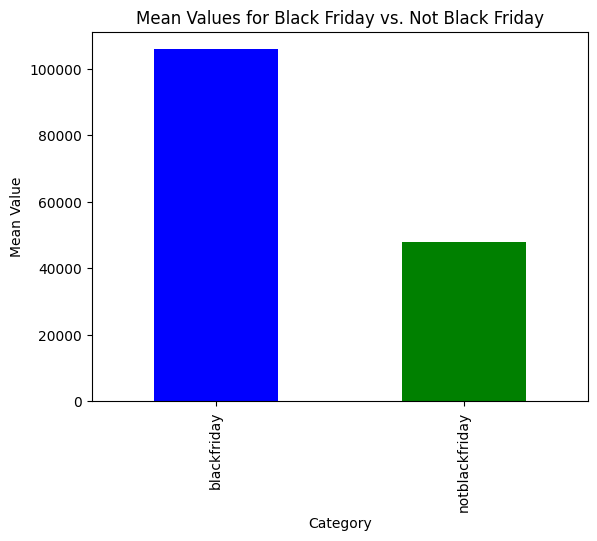

In [60]:
import matplotlib.pyplot as plt
BlackFriday2020.plot(x='sort', y='mean', kind='bar', legend=False, color=['blue', 'green'])
plt.title('2020 Mean Values for Black Friday vs. Not Black Friday')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.show()

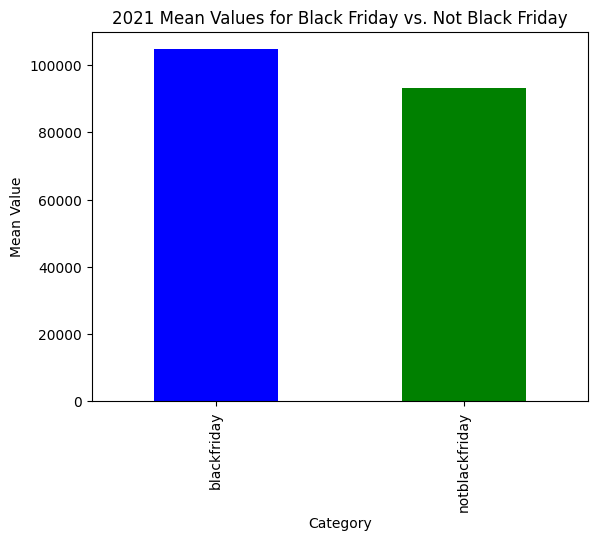

In [61]:
BlackFriday2021.plot(x='sort', y='mean', kind='bar', legend=False, color=['blue', 'green'])
plt.title('2021 Mean Values for Black Friday vs. Not Black Friday')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.show()

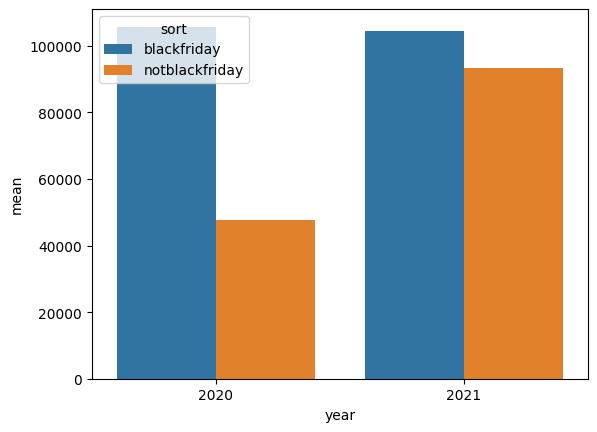

In [66]:
import seaborn as sns
sns.barplot(x='year',y='mean',hue='sort',data=BF)
plt.show()

### 2. 추수감사절
- 2020-11-26
- 2021-11-25

In [67]:
df[df['Invoice Date']=='2020-11-26']

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
828,Foot Locker,1185732,2020-11-26,Midwest,Minnesota,Minneapolis,Men's Apparel,50.0,200,100000.0,30000.00,0.30,Outlet
4716,Foot Locker,1185732,2020-11-26,Midwest,Minnesota,Minneapolis,Men's Apparel,49.0,58,2842.0,1165.22,0.41,Online


---

## 제품별 판매량

In [3]:
import pandas as pd
df = pd.read_csv('ex1.csv')
df

,Product,Units_Sold
0,Men's Street Footwear,593320
1,Men's Athletic Footwear,435526
2,Women's Apparel,433827
3,Women's Street Footwear,392269
4,Women's Athletic Footwear,317236
5,Men's Apparel,306683


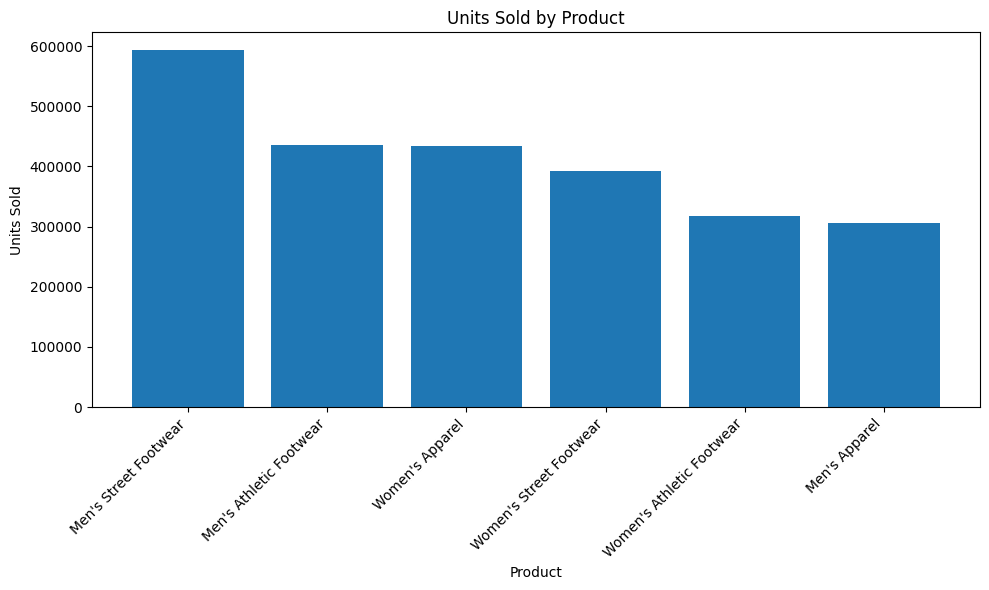

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['Product'], df['Units_Sold'])
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Units Sold by Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## 제품별 매출액

In [7]:
df = pd.read_csv('ex2.csv')
df

,Product,Total_Sales
0,Men's Street Footwear,208826244
1,Women's Apparel,179038860
2,Men's Athletic Footwear,153673680
3,Women's Street Footwear,128002813
4,Men's Apparel,123728632
5,Women's Athletic Footwear,106631896


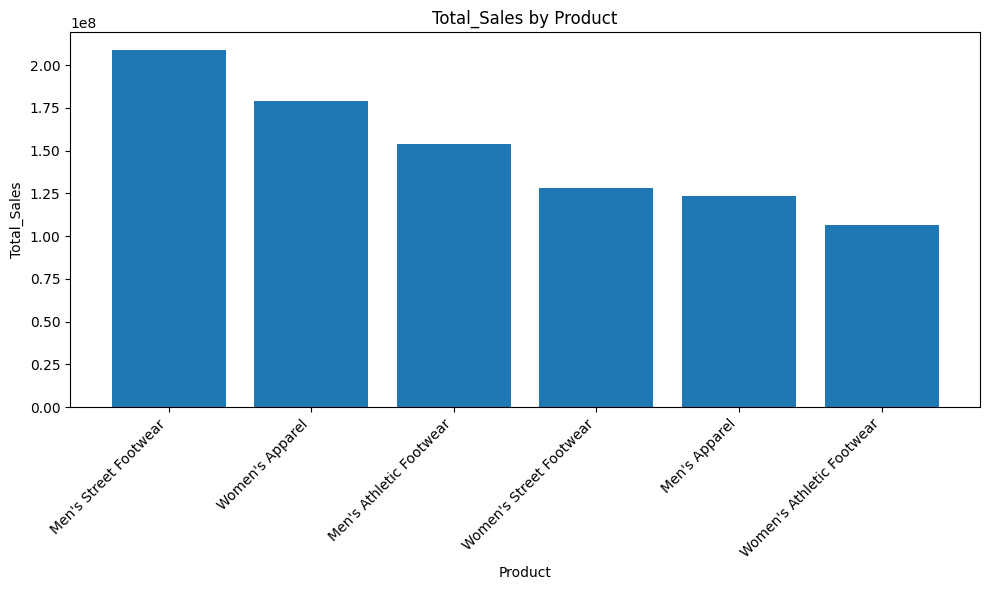

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['Product'], df['Total_Sales'])
plt.xlabel('Product')
plt.ylabel('Total_Sales')
plt.title('Total_Sales by Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## 각 도시별 가장 많이 팔린 제품

In [9]:
df = pd.read_csv('ex3.csv')
df

,City,Product,UnitsSold
0,Charleston,Men's Street Footwear,23819
1,New York,Men's Street Footwear,22707
2,Portland,Men's Street Footwear,18185
3,San Francisco,Men's Street Footwear,17235
4,Houston,Men's Street Footwear,17019
5,Los Angeles,Men's Street Footwear,15575
6,Miami,Men's Street Footwear,15453
7,Charlotte,Men's Street Footwear,13969
8,Jackson,Men's Street Footwear,13839
9,Dallas,Men's Street Footwear,13536


## 각 주 별 많이 팔린 제품

In [10]:
df = pd.read_csv('ex4.csv')
df

,State,Product,UnitsSold
0,New York,Men's Street Footwear,35855
1,California,Men's Street Footwear,32810
2,Texas,Men's Street Footwear,30555
3,Florida,Men's Street Footwear,28732
4,South Carolina,Men's Street Footwear,15598
5,North Carolina,Men's Street Footwear,13969
6,Mississippi,Men's Street Footwear,13839
7,Tennessee,Men's Street Footwear,13111
8,Georgia,Men's Street Footwear,12955
9,Alabama,Men's Street Footwear,12612


## 각 주 별 가장 매출이 많은 도시

In [11]:
df = pd.read_csv('ex5.csv')
df

,State,City,TotalSales
0,New York,New York,39801235
1,California,San Francisco,34539220
2,Florida,Miami,31600863
3,South Carolina,Charleston,29285637
4,Washington,Seattle,26330718
5,Texas,Houston,25456882
6,North Carolina,Charlotte,23956531
7,Louisiana,New Orleans,23750781
8,Hawaii,Honolulu,22282457
9,Virginia,Richmond,21575040


In [15]:
df1 = df.head(5)
df2 = df.tail(5)

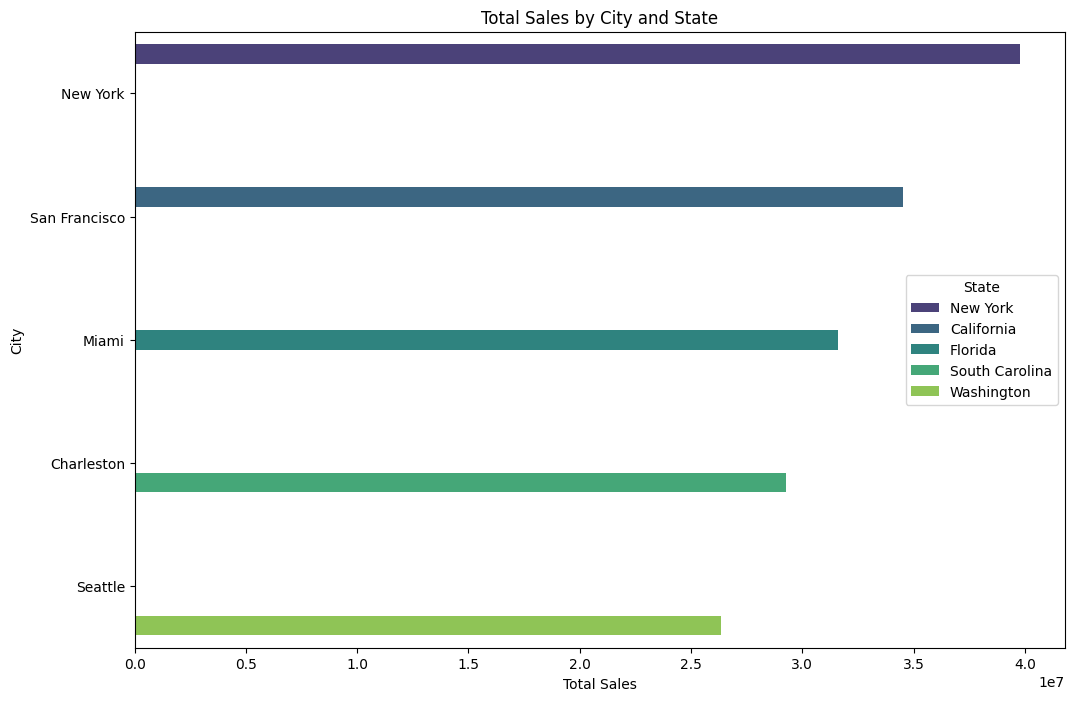

In [19]:
import seaborn as sns
# 상위 5개
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalSales', y='City', data=df1, hue='State', palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.title('Total Sales by City and State')
plt.show()

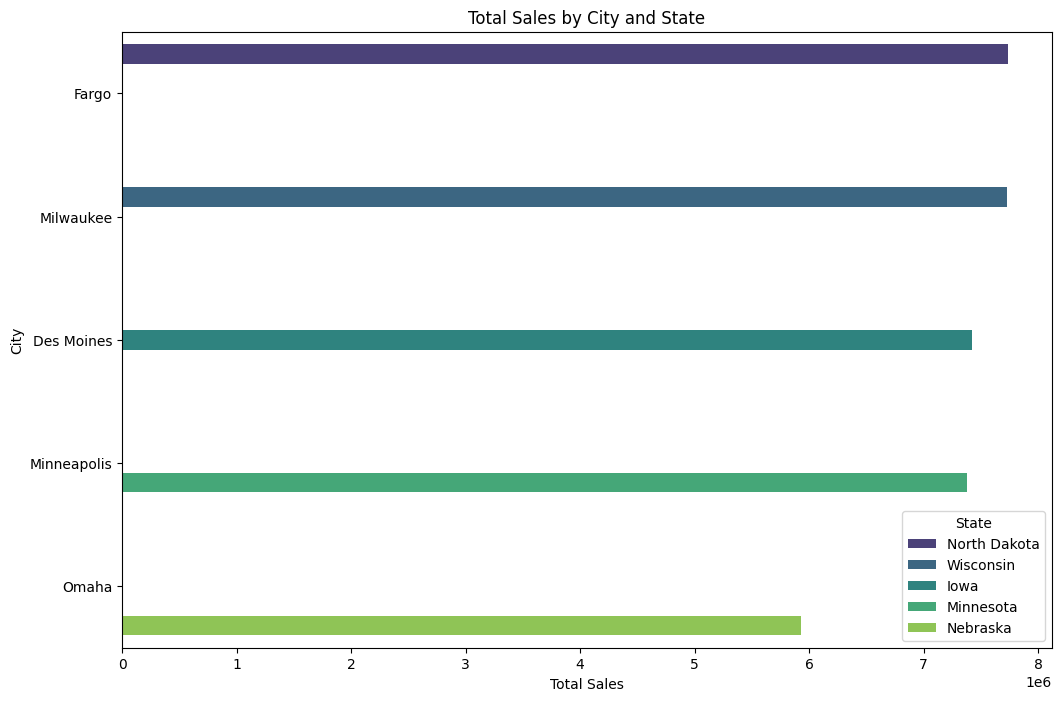

In [20]:
import seaborn as sns
# 하위 5개
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalSales', y='City', data=df2, hue='State', palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.title('Total Sales by City and State')
plt.show()

## 블랙프라이데이+추수감사절 기간과 그 외 날의 매출 차이
- 2020-11-26 & 2020-11-27 -> 2020-11-23 ~ 2020-11-27
- 2021-11-25 & 2021-11-26 -> 2021-11-22 ~ 2021-11-26



In [25]:
bf = pd.read_csv('ex6_1.csv')
bf

,year,BF
0,2020,61674.0000
1,2021,86676.6768


In [27]:
nbf = pd.read_csv('ex6_2.csv')
nbf.rename(columns={'year':'year','BF':'NBF'},inplace=True)
nbf

,year,NBF
0,2020,85656.8153
1,2021,85167.1681


In [28]:
merged_df = pd.merge(bf, nbf, on='year')
merged_df

,year,BF,NBF
0,2020,61674.0000,85656.8153
1,2021,86676.6768,85167.1681


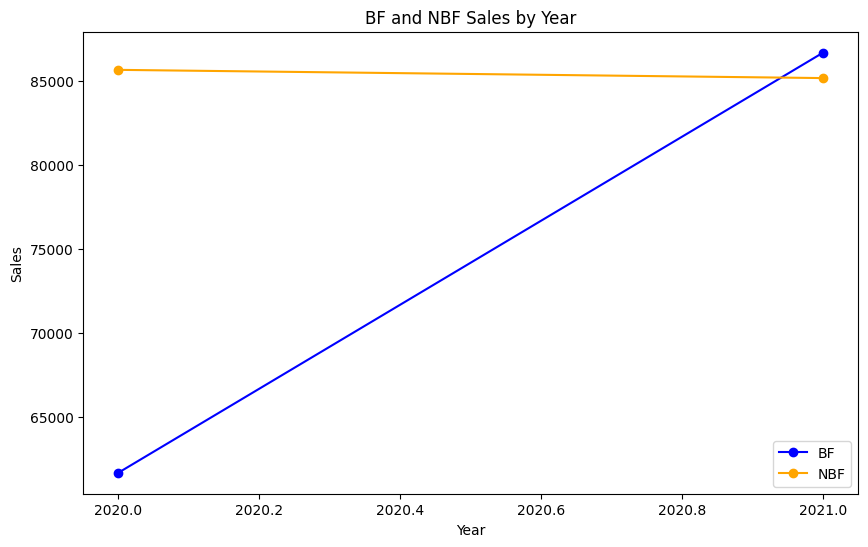

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['year'], merged_df['BF'], marker='o', label='BF', color='blue')
plt.plot(merged_df['year'], merged_df['NBF'], marker='o', label='NBF', color='orange')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('BF and NBF Sales by Year')
plt.legend()
plt.show()

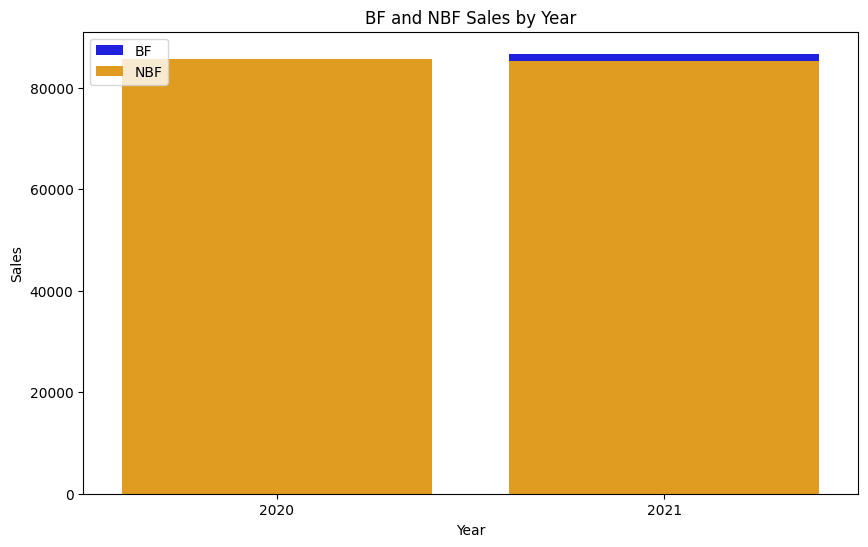

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='BF', data=merged_df, color='blue', label='BF')
sns.barplot(x='year', y='NBF', data=merged_df, color='orange', label='NBF')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('BF and NBF Sales by Year')
plt.legend()
plt.show()

## 7. 크리스마스 기간과 그 외 날의 매출 차이
- 2020-12-18 ~ 2020-12-24 count : 25 / 734
- 2021-12-18 ~ 2021-12-24 count : 176 / 583


In [33]:
df1 = pd.read_csv('ex7_1.csv')
df2 = pd.read_csv('ex7_2.csv')

In [34]:
df1

,year,CM
0,2020,82461.4400
1,2021,114180.4659


In [35]:
df2

,year,NCM
0,2020,114142.2629
1,2021,112772.2041


In [36]:
merged_df = pd.merge(df1, df2, on='year')
merged_df

,year,CM,NCM
0,2020,82461.4400,114142.2629
1,2021,114180.4659,112772.2041


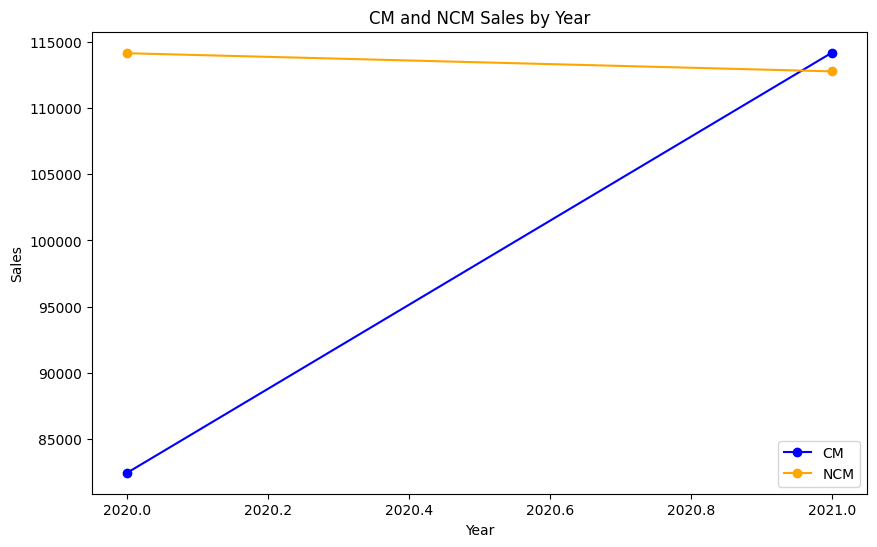

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['year'], merged_df['CM'], marker='o', label='CM', color='blue')
plt.plot(merged_df['year'], merged_df['NCM'], marker='o', label='NCM', color='orange')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('CM and NCM Sales by Year')
plt.legend()
plt.show()

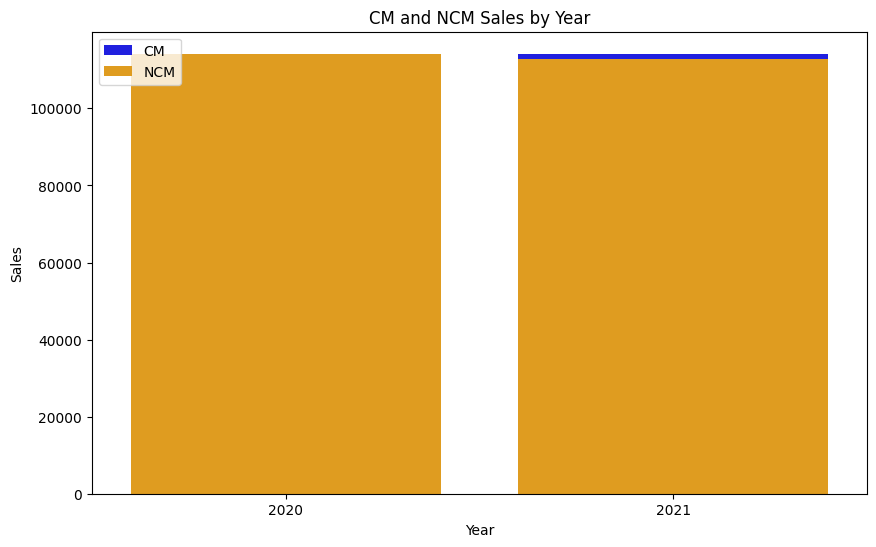

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='CM', data=merged_df, color='blue', label='CM')
sns.barplot(x='year', y='NCM', data=merged_df, color='orange', label='NCM')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('CM and NCM Sales by Year')
plt.legend()
plt.show()

## 블랙프라이데이+추수감사절이 있는 11월달과 크리스마스 있는 12월달,  그 외의 달 매출 량 비교


In [21]:
df = pd.read_csv('ex8.csv')
df

,year,month,UnitsSold
0,2020,other,377.0606
1,2020,11,239.5429
2,2020,12,223.3152
3,2021,other,242.6550
4,2021,11,216.4493
5,2021,12,256.7406


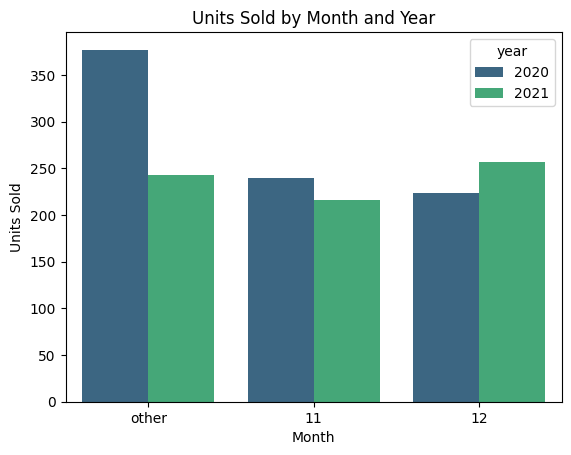

In [22]:
sns.barplot(x='month', y='UnitsSold', hue='year', data=df, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Units Sold by Month and Year')
plt.show()